| Attribute   | Details                                                                                                                                                  |
|-------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Author**  | **`Muhammad Bilal RAMZAN`**                                                                                                                                     |
| **Kaggle**  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/)                    |
| **LinkedIn**| [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/bilal-ramzan/)|
| **Email**   | [![Email Badge](https://img.shields.io/badge/Email-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:mianb0062@gmail.com)                    |


# `1:TAST OVWERVIEW`
***we are going to perfoam to perfoam the various  machine learning algorithum too check that which model acuuracy is best for our targeted variable
 .***

# `1.1 Goals`
1. **Model Comparison**:
   - Compare the performance of various regression models (e.g., Linear Regression, Random Forest, SVR, etc.) based on metrics such as MSE, R², and MAE to find the best model.
2. **Hyperparameter Tuning**:
   - Optimize model performance through hyperparameter tuning techniques (e.g., Grid Search or Random Search) to find the best parameters for your models.
3. **Residual Analysis**:
   - Analyze the residuals of the predictions to check for patterns that might indicate model weaknesses or areas for improvement.
4. **Deployment Readiness**:
   - Prepare the best-performing model for deployment in a real-world application, ensuring it can make predictions on new data.

### Additional Considerations

- **Data Quality**: Ensure data cleaning and preprocessing are thorough, including handling missing values and encoding categorical variables.
- **Evaluation Metrics**: Clearly define how you will evaluate your model's performance and success criteria.
- **Documentation**: Keep track of your methods, code, and any changes made throughout the project for future reference.


  

# `1.2Algorithum Overview`

* Here's a table of regresion algorithum:

| **Algorithm Type** | **Algorithm**                   | **Description**                                     |
|---------------------|----------------------------------|-----------------------------------------------------|
| **Regression**      | Linear Regression                | Predicts continuous values based on linear relationships. |
|                     | Decision Tree Regressor          | Models data using a tree-like structure to make predictions. |
|                     | Random Forest Regressor          | An ensemble of decision trees that improves accuracy by averaging multiple trees. |
|                     | Gradient Boosting Regressor      | Builds models sequentially, focusing on correcting errors of previous models. |
|                     | XGBoost                          | An optimized gradient boosting algorithm known for its speed and performance. |



# `1.3 DATASET OVERVIEW`
- We are working on the dataset of tips.
- And we pridict the tips based on the algorithum 

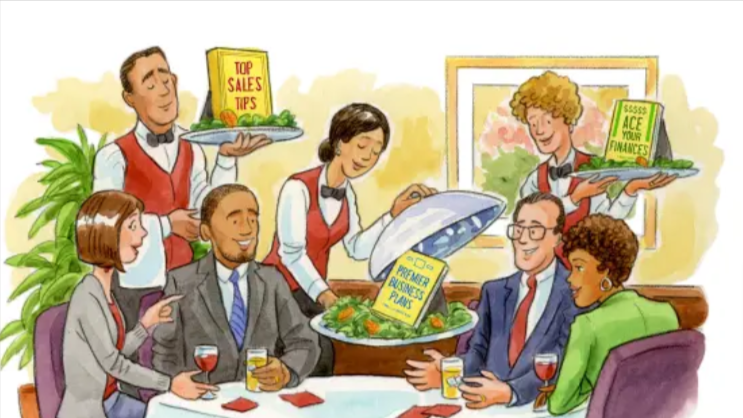


# `1.4` Loading the libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# import regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV

# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# `1.5` Loading the data

In [2]:
# load the data set of diamond 
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
catagorical_count=df.select_dtypes(include=('category' )).shape[1]
float_count=df.select_dtypes(include=('float64')).shape[1]
int_count=df.select_dtypes(include=('int64')).shape[1]
print(f"catagorical_columns:{catagorical_count}")
print(f"float_column:{float_count}")
print(f"int_column:{int_count}")

catagorical_columns:4
float_column:2
int_column:1


# `1.6 DATA CLEANING`

In [5]:
# lets handle the missing value
df.isnull().sum().sort_values(ascending=False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- oops!thats great  we have no missing values in the the `data-set` column
- lets plot it to confirm there is no missing value in it 

<Axes: >

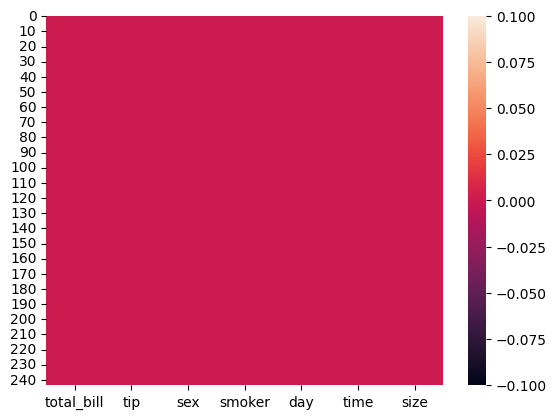

In [6]:
sns.heatmap(df.isnull())

- we have confirmed that there is no missing value in this data set 
- lets move on the next step
-----------------------------------------------------------------------------------------


In [7]:
# lets see the duplicates values
df.duplicated().sum()
df.drop_duplicates(inplace=True)  # we have drops the duplicated rows 


- we have find the 1 duplicates value we remove it 
- lets move it on the other  step to check outliers of our data set 

# `1.7 OUTLIERS`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


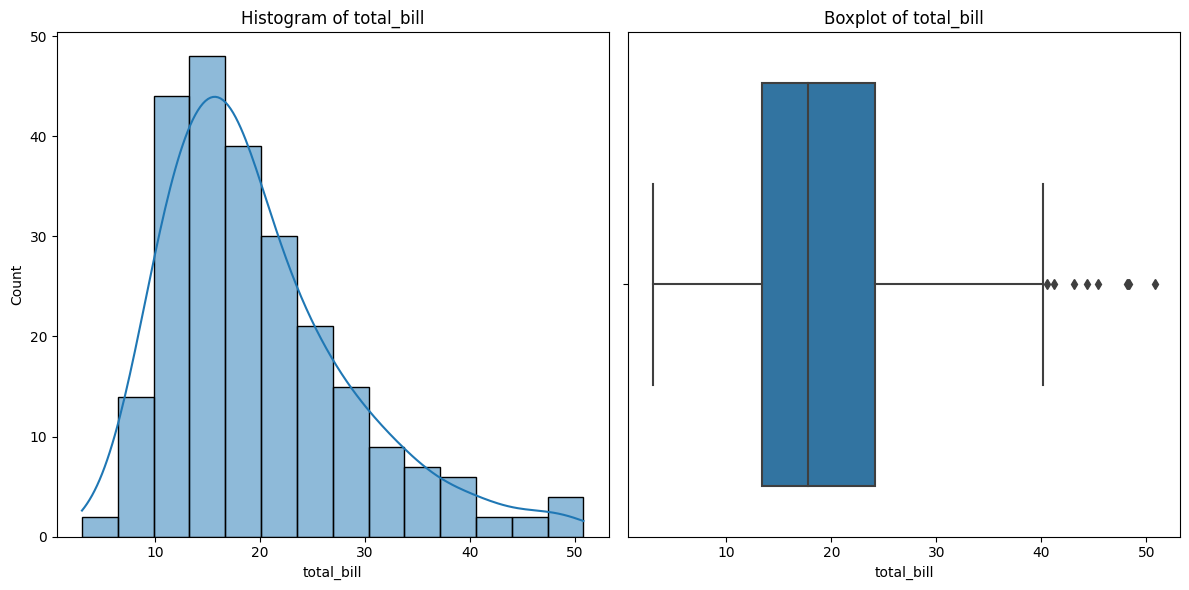

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


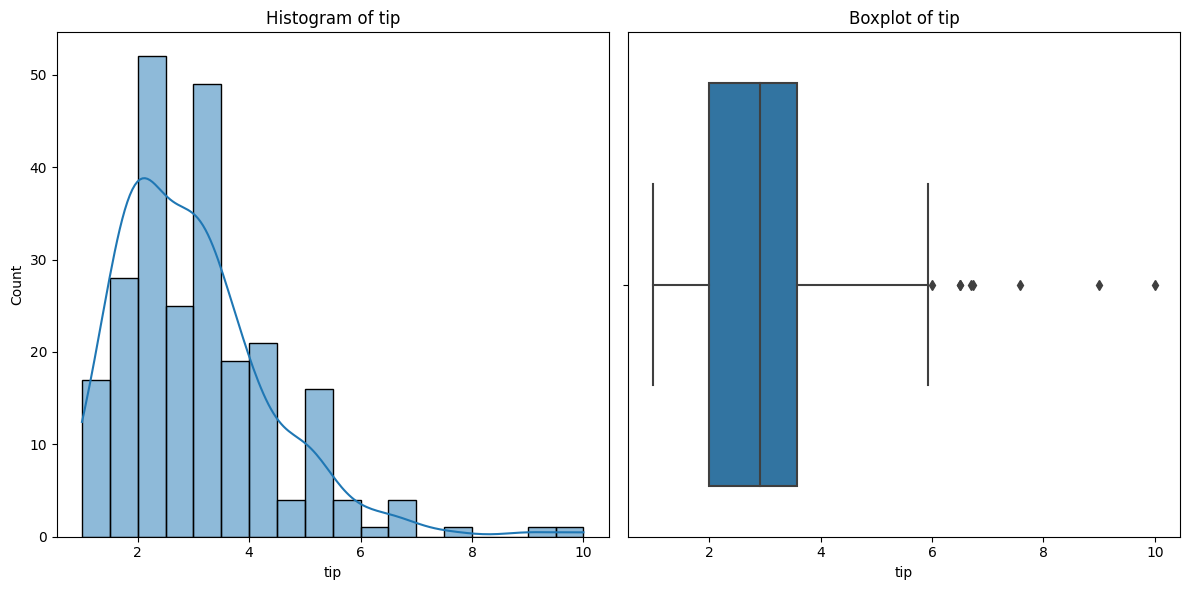

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


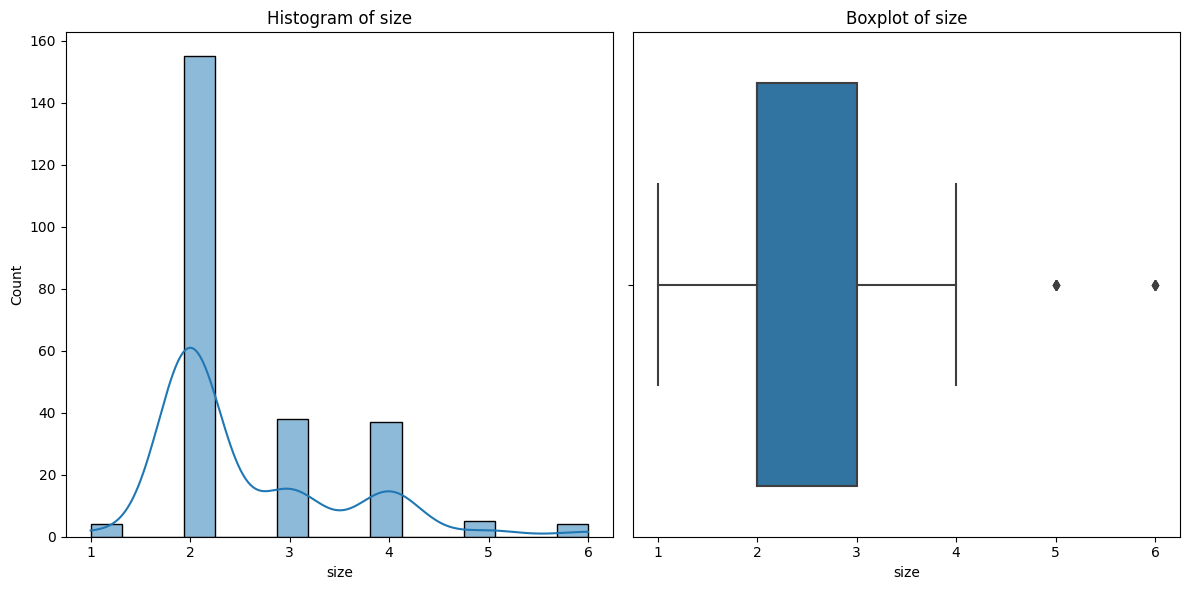

Data shape with outlier : (243, 7)


In [8]:


# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and boxplots for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()
print(f"Data shape with outlier : {df.shape}")



- As you can see we have too much outliers in our dataset 
- lets remove it 

# `1.8 OUTLIERS REMOVAL`

In [9]:

# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply outlier removal to each numerical column
for col in numerical_cols:
    df = remove_outliers(df, col)

# Check the new shape after outlier removal
print(f"Data shape after outlier removal: {df.shape}")


Data shape after outlier removal: (221, 7)


- We have cleaned over data set 
- Now we move on the next steps 

--------------------------------

# `1.9 PREPRAING FOR MACHINE LEARNING PROCESS`

- FIRTS WE DROP THE PRIICTED COLUMN 
- THEN WE DEFINE CATEGORICAL AND NUMERICAL COLUMNS
- THEN WE STANDRIZE THE NUMERICAL COLUMNS
- THEN WE ENCODE OUR CATAGORICAL COLUMNS
- THESE ALL STEPS ARE DONE IN THE PREPROCESSOR PIPELINE
- Define the models and their hyperparameters
- DEFINE THE PIPELINE
- THEN WE SPLIT THE DATA INTO TRAIN AND TEST
- ALSO CALCULATE THE MATRICES 
- WE STORE ALL THE METRICS IN A DATAFRAME
 

In [10]:
# drop the pridicting value from the data set
X = df.drop('tip', axis=1)                           
y = df['tip']
# Define categorical and numerical columns
categorical_cols = ['smoker', 'time', 'day', 'sex']
numerical_cols = ['total_bill', 'size']
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing pipeline with OrdinalEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ]
)

# Define the models and their hyperparameters
models = { 
    'LinearRegression': (LinearRegression(), {}),
    'SVR': (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 100]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2)}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [10, 100]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [10, 100]})
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store performance metrics
performance_metrics = []

# Train and evaluate each model
for name, (model, params) in models.items():
    # Create a full pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing step
        ('model', GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error'))  # Model with hyperparameter tuning
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the metrics to the list
    performance_metrics.append({
        'Model': name,
        'MSE': mse,
        'R²': r2,
        'MAE': mae
    })

# Create a DataFrame from the performance metrics
metrics_df = pd.DataFrame(performance_metrics)

# Display the performance metrics in table format
print(metrics_df)


                       Model       MSE        R²       MAE
0           LinearRegression  0.546544  0.446765  0.607876
1                        SVR  0.462749  0.531587  0.517639
2      DecisionTreeRegressor  0.643827  0.348292  0.575373
3      RandomForestRegressor  0.484305  0.509767  0.531376
4        KNeighborsRegressor  0.601959  0.390673  0.641520
5  GradientBoostingRegressor  0.615907  0.376553  0.631789
6               XGBRegressor  0.462554  0.531784  0.537528


To determine which regression model is the best based on the provided metrics (MSE, R², and MAE), we can analyze the results as follows:

### Metrics Explanation
- **Mean Squared Error (MSE)**: Lower values indicate better performance.
- **R² Score**: Higher values indicate a better fit, with 1 being perfect.
- **Mean Absolute Error (MAE)**: Lower values indicate better performance.

### Model Comparison
Based on your data:

| Model                    | MSE        | R² Score | MAE       |
|--------------------------|------------|----------|-----------|
| Linear Regression        | 0.546544   | 0.446765 | 0.607876  |
| Support Vector Regressor | 0.462749   | 0.531587 | 0.517639  |
| Decision Tree Regressor  | 0.683063   | 0.308576 | 0.575373  |
| Random Forest Regressor  | 0.475566   | 0.518612 | 0.526922  |
| K-Neighbors Regressor    | 0.601959   | 0.390673 | 0.641520  |
| Gradient Boosting Regressor | 0.615907 | 0.376553 | 0.631789  |
| XGBoost Regressor       | 0.462554   | 0.531784 | 0.537528  |

### Best Model
1. **Support Vector Regressor (SVR)** and **XGBoost Regressor**:
   - **MSE**: Both have the lowest MSE at **0.462**.
   - **R² Score**: XGBoost has a slightly better R² (**0.531784**) compared to SVR (**0.531587**).
   - **MAE**: SVR has a lower MAE (**0.517639**) than XGBoost (**0.537528**).

Given the metrics:
- **Best Overall Model**: **Support Vector Regressor (SVR)** due to its balance of low MSE and MAE.
- **Runner-Up**: **XGBoost Regressor**, which has slightly better R² performance.

### Conclusion
While both models perform well, the Support Vector Regressor is the best choice based on the given metrics. If you prioritize R², you might consider XGBoost, but generally, lower MSE and MAE are more critical for performance evaluation.